# Homework 4

Maksim Nikiforov

## Part 1 - Summarizing student data

### Task 1 - Read in the data

In [1]:
import pandas as pd

# Read data locally and specify semicolon as delimiter
math_data = pd.read_csv("student-mat.csv", delimiter=';')

### Task 2 - Summarize the data

#### Categorical variables

In [2]:
# Convert some of the categorical variables into category type variables
math_data.school = math_data.school.astype("category")
math_data.sex = math_data.sex.astype("category")
math_data.address = math_data.address.astype("category")
math_data.Pstatus = math_data.Pstatus.astype("category")
math_data.Medu = math_data.Medu.astype("category")
math_data.Fedu = math_data.Fedu.astype("category")
math_data.Mjob = math_data.Mjob.astype("category")
math_data.Fjob = math_data.Fjob.astype("category")
math_data.reason = math_data.reason.astype("category")
math_data.guardian = math_data.guardian.astype("category")
math_data.studytime = math_data.studytime.astype("category")
math_data.traveltime = math_data.traveltime.astype("category")
math_data.schoolsup = math_data.schoolsup.astype("category")
math_data.famsup = math_data.famsup.astype("category")
math_data.paid = math_data.paid.astype("category")
math_data.activities = math_data.activities.astype("category")
math_data.higher = math_data.higher.astype("category")
math_data.romantic = math_data.romantic.astype("category")
math_data.freetime = math_data.freetime.astype("category")
math_data.goout = math_data.goout.astype("category")
math_data.health = math_data.health.astype("category")
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [3]:
# Create a one-way contingency table
math_data.address.value_counts()

U    307
R     88
Name: address, dtype: int64

In this one-way contingency table, we see that most student in the data set - 307 - live live in an urban home. The remaining 88 students live in a rural home.

In [4]:
# Create a two-way contingency table
pd.crosstab(math_data.sex, math_data.higher, margins=True)

higher,no,yes,All
sex,,,
F,4,204,208
M,16,171,187
All,20,375,395


In this two-way contingency table, we see that the data includes information on 208 females and 187 males. Only 4 females and 16 males do not wish to pursue higher education.  

In [5]:
# Create a three-way contingency table
pd.crosstab(
    [math_data.guardian, math_data.famsup],
    math_data.sex,
    margins=True
)

sex                F    M  All
guardian famsup               
father   no       13   21   34
         yes      30   26   56
mother   no       46   61  107
         yes      99   67  166
other    no        7    5   12
         yes      13    7   20
All              208  187  395

The majority of students list "mother" as their guardian. In this subgroup, 99 females receive family educational support and 46 do not. The males are more evenly split; 67 males with "mother" as their guardian receive family educational support, and 61 do not. 

In [6]:
# Create a conditional two-way table by 
# subsetting the data (say with .loc) and then creating the two-way table

# Subset data with .loc to include only two columns: reason behind school choice and student's sex 
school_choice_reason = math_data.loc[:, ["reason", "sex"]] 

# Create the two-way table
pd.crosstab(school_choice_reason.reason, school_choice_reason.sex, margins=True)

sex,F,M,All
reason,,,
course,72,73,145
home,53,56,109
other,18,18,36
reputation,65,40,105
All,208,187,395


Here, we see that the majority of students (145) selected their school because of course preference, followed by proximity to home (109) and school reputation (105). 

In [7]:
# Create a conditional two-way table by 
# creating a three-way table and subsetting it

# Create the three-way contingency table
study_activities_tab = pd.crosstab(
    [math_data.studytime, math_data.activities],
    math_data.sex,
    margins=True
)

study_activities_tab

sex                     F    M  All
studytime activities               
1         no           16   43   59
          yes          11   35   46
2         no           64   31   95
          yes          49   54  103
3         no           24    5   29
          yes          27    9   36
4         no            8    3   11
          yes           9    7   16
All                   208  187  395

In [8]:
# Subset three-way table for females only to include 
# bivariate information on study time and participation in extracurricular activities
study_activities_tab.loc[:, "F"]

studytime  activities
1          no             16
           yes            11
2          no             64
           yes            49
3          no             24
           yes            27
4          no              8
           yes             9
All                      208
Name: F, dtype: int64

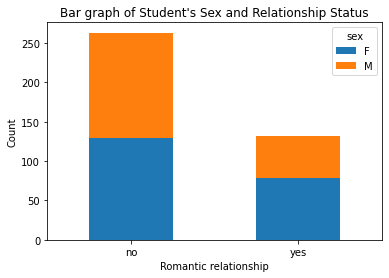

In [9]:
# Create a stacked bar graph. 
# Give relevant x and y labels, and a title for the plots.

# Import pyplot submodule
import matplotlib.pyplot as plt

table = pd.crosstab(math_data.romantic, math_data.sex)
table.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.xlabel("Romantic relationship")
plt.ylabel("Count")
plt.title("Bar graph of Student's Sex and Relationship Status")
plt.show()
plt.close()

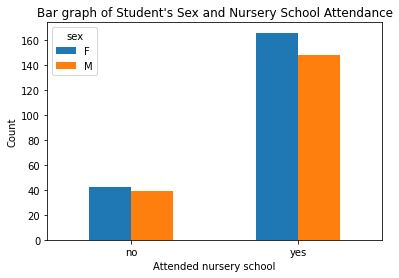

In [10]:
# Create a side-by-side bar graph. 
# Give relevant x and y labels, and a title for the plots.
table = pd.crosstab(math_data.nursery, math_data.sex)
table.plot.bar()
plt.xticks(rotation = 0)
plt.xlabel("Attended nursery school")
plt.ylabel("Count")
plt.title("Bar graph of Student's Sex and Nursery School Attendance")
plt.show()
plt.close()

#### Numeric variables (and across groups)

In [11]:
# The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).
numeric_vars = math_data[["age", "absences", "G3"]]

# Find measures of center and spread for three of these variables (including G3 as one of them)
numeric_vars.agg(["mean", "std"])

,age,absences,G3
mean,16.696203,5.708861,10.415190
std,1.276043,8.003096,4.581443


In [12]:
# Find measures of center and spread across a single grouping variable for three of these variables
# (including G3 as one of them)

import numpy as np

math_data \
.groupby("sex") \
.agg(
    mean_age = ("age", np.mean), 
    mean_absences = ("absences", np.mean),
    mean_G3 = ("G3", np.mean),
    std_age = ("age", np.std),
    std_absences = ("absences", np.std),
    std_G3 = ("G3", np.std)
)

,mean_age,mean_absences,mean_G3,std_age,std_absences,std_G3
sex,,,,,,
F,16.730769,6.216346,9.966346,1.201696,9.445819,4.622338
M,16.657754,5.144385,10.914439,1.356181,5.980749,4.495297


In [13]:
# Find measures of center and spread across two grouping variables for three of these variables 
# (including G3 as one of them)

math_data \
.groupby(["sex", "address"]) \
.agg(
    mean_age = ("age", np.mean), 
    mean_absences = ("absences", np.mean),
    mean_G3 = ("G3", np.mean),
    std_age = ("age", np.std),
    std_absences = ("absences", np.std),
    std_G3 = ("G3", np.std)
)

mean_age  mean_absences    mean_G3   std_age  std_absences  \
sex address                                                                
F   R        16.977273       7.454545   9.272727  1.229268     12.704979   
    U        16.664634       5.884146  10.152439  1.189305      8.378617   
M   R        17.113636       4.795455   9.750000  1.333223      4.521677   
    U        16.517483       5.251748  11.272727  1.336662      6.372773   

               std_G3  
sex address            
F   R        4.447961  
    U        4.663649  
M   R        4.700940  
    U        4.384964

In [14]:
# Create a correlation matrix between all of the numeric variables.
# The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

math_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


Text(0.5, 0, 'Grades')

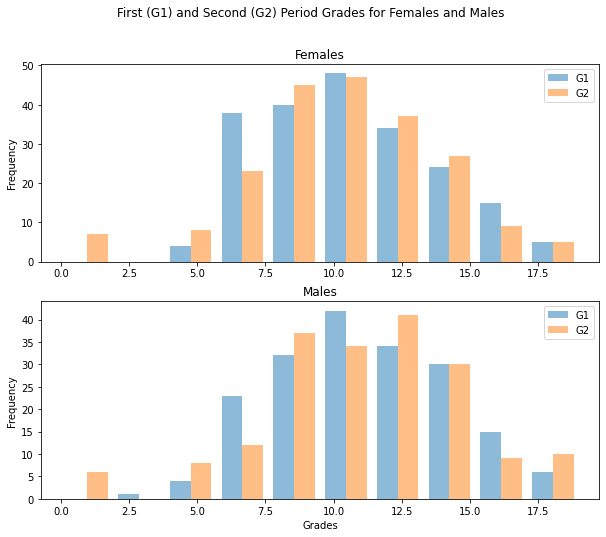

In [15]:
# Create a histogram for two of the numeric variables across one of the
# categorical variables

# Create a data frame with two numeric variables and one categotical variable
grade_DF = math_data[["G1", "G2", "sex"]]

# Create histogram
grade_histo = grade_DF.plot.hist(alpha=0.5, by="sex", figsize=(10, 8), title=['Females', 'Males'])
plt.suptitle('First (G1) and Second (G2) Period Grades for Females and Males')
plt.xlabel("Grades")

Text(0.5, 0, 'Grades')

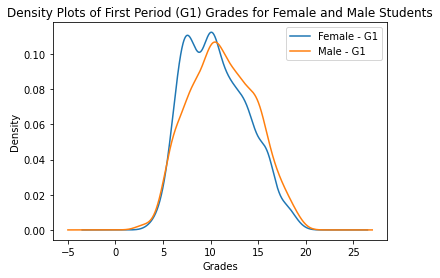

In [16]:
# Create a kernel density plot for two of the numeric variables across one of the
# categorical variables

# G1 density plot
G1_grades = math_data.groupby("sex")["G1"].plot.density(bw_method=0.25)
plt.title("Density Plots of First Period (G1) Grades for Female and Male Students")
plt.legend(["Female - G1", "Male - G1"])
plt.xlabel("Grades")

Text(0.5, 0, 'Grades')

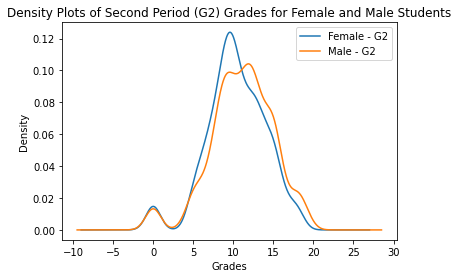

In [17]:
# G2 density plot
G2_grades = math_data.groupby("sex")["G2"].plot.density(bw_method=0.25)

plt.title("Density Plots of Second Period (G2) Grades for Female and Male Students")
plt.legend(["Female - G2", "Male - G2"])
plt.xlabel("Grades")

Text(0.5, 0, 'Grades')

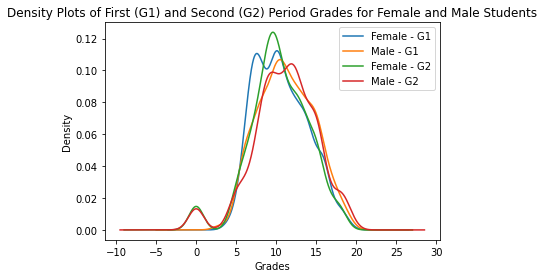

In [18]:
# G1 and G2 combined into one plot
G1_grades = math_data.groupby("sex")["G1"].plot.density(bw_method=0.25)
G2_grades = math_data.groupby("sex")["G2"].plot.density(bw_method=0.25)
plt.title("Density Plots of First (G1) and Second (G2) Period Grades for Female and Male Students")
plt.legend(["Female - G1", "Male - G1", "Female - G2", "Male - G2"])
plt.xlabel("Grades")

Text(0.5, 0, "Student's sex")

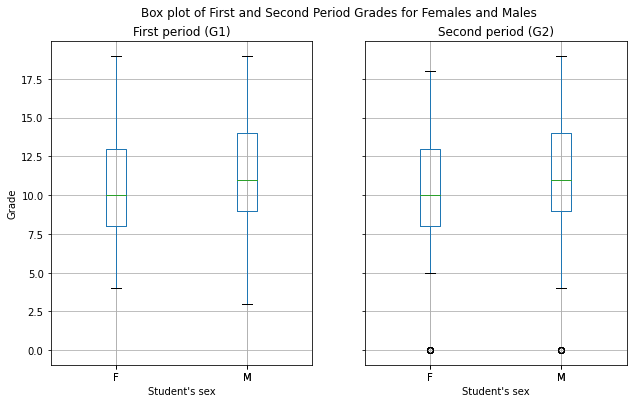

In [19]:
# Create a box plot for two of the numeric variables across one of the
# categorical variables

box_plot = math_data.boxplot(column=["G1", "G2"], by=["sex"], figsize=(10, 6))
plt.suptitle('Box plot of First and Second Period Grades for Females and Males')
box_plot[0].set_xlabel("Student's sex")
box_plot[0].set_title("First period (G1)")
box_plot[0].set_ylabel("Grade")
box_plot[1].set_title("Second period (G2)")
box_plot[1].set_xlabel("Student's sex")

Text(0, 0.5, 'Final grade')

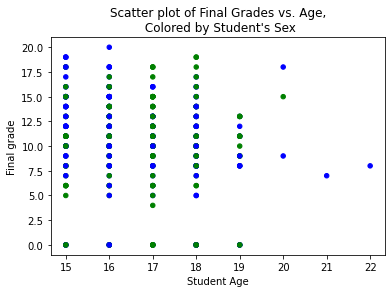

In [20]:
# Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). 
# Color the points by a categorical variable in each. 
# Add appropriate labels and titles.

# Create our own color vector using list comprehension
color_vec = ["blue" if sex == "M" else "green" for sex in math_data.sex]
math_data["var_color"] = color_vec

# Plot age vs. G3 grades using color vector
scatter_age = math_data.plot.scatter(x="age", y="G3", c ="var_color", cmap="viridis", title="Scatter plot of Final Grades vs. Age,\n Colored by Student's Sex")
scatter_age.set_xlabel("Student Age")
scatter_age.set_ylabel("Final grade")

Text(0, 0.5, 'Final grade')

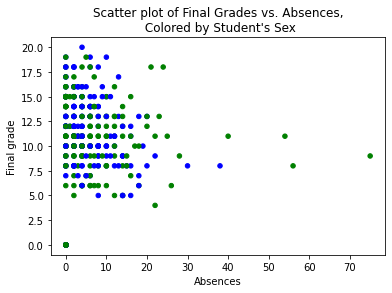

In [21]:
# Plot age vs. G3 grades using color vector
scatter_absences = math_data.plot.scatter(x="absences", y="G3", c ="var_color", cmap="viridis", title="Scatter plot of Final Grades vs. Absences,\n Colored by Student's Sex")
scatter_absences.set_xlabel("Absences")
scatter_absences.set_ylabel("Final grade")

## Part 2 - Summarizing World Development

### Task 1 - Read in the Data

In [22]:
# Read in local file
world_dev_indicators = pd.read_excel("WorldDevelopmentIndicators.xlsx", sheet_name="Data")
world_dev_indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2000,73.702495
1,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2001,74.944860
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2002,76.258066
3,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2003,77.120464
4,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2004,78.094440


### Task 2 - Summarize the data

Create at least three line charts showing how variables (of your choosing) change over time. Group by region or country code. Add appropriate labels and titles and describe what you see below each plot using markdown.

#### Line plot 1 - changes in agricultural land (% of land area)

In [23]:
# Subset data frame to include only agricultural land (% of land area) for
# North America, European Union, and East Asia & Pacific
agricultural_land = world_dev_indicators[(world_dev_indicators['Indicator Name'] == 'Agricultural land (% of land area)') & \
                                         ((world_dev_indicators['Country Name'] == 'North America') | \
                                          (world_dev_indicators['Country Name'] == 'European Union') | \
                                          (world_dev_indicators['Country Name'] == 'East Asia & Pacific')
                                         )]

# Exclude all columns other than "Country Name", "Year", "Value"
agricultural_land = agricultural_land[["Country Name", "Year", "Value"]]

# Show a few rows
agricultural_land.head()

,Country Name,Year,Value
110626,East Asia & Pacific,1961,43.329285
110627,East Asia & Pacific,1962,43.552552
110628,East Asia & Pacific,1963,43.807975
110629,East Asia & Pacific,1964,44.062835
110630,East Asia & Pacific,1965,44.395486


Text(0, 0.5, 'Agricultural land (% of land area)')

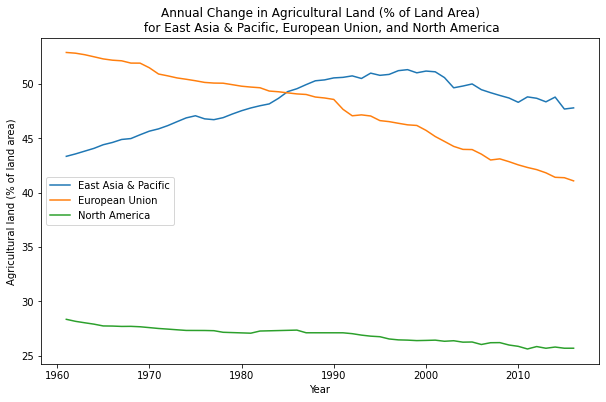

In [24]:
# The index of the data frame is plotted on the x-axis, 
# so set "Year" as the index
agricultural_land.set_index("Year", inplace=True)

# Create line plot
agricultural_land.groupby("Country Name")["Value"].plot(legend=True, figsize=(10, 6))
plt.title("Annual Change in Agricultural Land (% of Land Area)\n for East Asia & Pacific, European Union, and North America")
plt.ylabel("Agricultural land (% of land area)")

This plot shows annual changes in agricultural land as a percentage of the total land area for East Asia and the Pacific, the European Union, and North America. In 1960, the European Union had the highest ratio of agricultural land to total land area, and the United States had the lowest. However, this ratio has continue to decline in both areas. In East Asia & the Pacific region, the share of agricultural land rose steadily from 1960 until just before the year 2000, and began to slowly decline thereafter.

#### Line plot 2 - changes in CO2 emissions (kt)

In [25]:
# Subset data frame to include only CO2 emissions (kt) for
# North America, European Union, and East Asia & Pacific
CO2_emissions = world_dev_indicators[(world_dev_indicators['Indicator Name'] == 'CO2 emissions (kt)') & \
                                         ((world_dev_indicators['Country Name'] == 'North America') | \
                                          (world_dev_indicators['Country Name'] == 'European Union') | \
                                          (world_dev_indicators['Country Name'] == 'East Asia & Pacific')
                                         )]

# Exclude all columns other than "Country Name", "Year", "Value"
CO2_emissions = CO2_emissions[["Country Name", "Year", "Value"]]

# Show a few rows
CO2_emissions.head()

,Country Name,Year,Value
112640,East Asia & Pacific,1960,1.215380e+06
112641,East Asia & Pacific,1961,1.052154e+06
112642,East Asia & Pacific,1962,9.654668e+05
112643,East Asia & Pacific,1963,1.010724e+06
112644,East Asia & Pacific,1964,1.066263e+06


Text(0, 0.5, 'CO2 emissions (kt)')

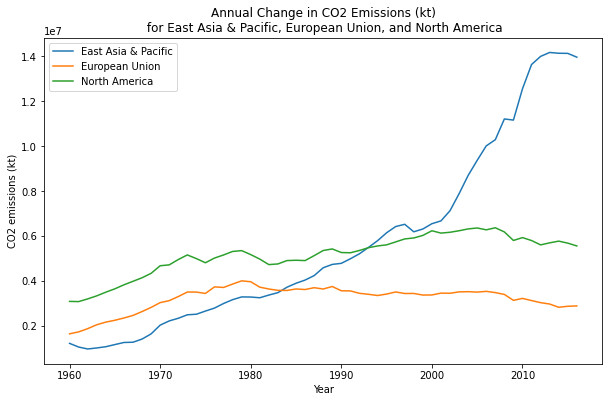

In [26]:
# The index of the data frame is plotted on the x-axis, 
# so set "Year" as the index
CO2_emissions.set_index("Year", inplace=True)

# Create line plot
CO2_emissions.groupby("Country Name")["Value"].plot(legend=True, figsize=(10, 6))
plt.title("Annual Change in CO2 Emissions (kt)\n for East Asia & Pacific, European Union, and North America")
plt.ylabel("CO2 emissions (kt)")

This plot shows annual changes in CO2 emissions (in units of kilotons) for East Asia and the Pacific, the European Union, and North America. In 1960, North America had the highest emissions, and East Asia and the Pacific had the lowest. Emissions in North America increased until just before 2010, when they saw a small decline. In the European Union, emissions rose until 1980 and have remained relatively steady thereafter. In East Asia and the Pacific, emissions rose more quickly than in other regions until the year 2000. Thereafer, there is a dramatic increase in emissions until 2010, when the numbers taper off. 

#### Line plot 3 - changes in electricity production from coal sources (% of total)

In [27]:
# Subset data frame to include only electricity production from coal sources (% of total) for
# North America, European Union, and East Asia & Pacific
coal_based_electricity = world_dev_indicators[(world_dev_indicators['Indicator Name'] == 'Electricity production from coal sources (% of total)') & \
                                         ((world_dev_indicators['Country Name'] == 'North America') | \
                                          (world_dev_indicators['Country Name'] == 'European Union') | \
                                          (world_dev_indicators['Country Name'] == 'East Asia & Pacific')
                                         )]

# Exclude all columns other than "Country Name", "Year", "Value"
coal_based_electricity = coal_based_electricity[["Country Name", "Year", "Value"]]

# Show a few rows
coal_based_electricity.head()

,Country Name,Year,Value
114780,East Asia & Pacific,1971,28.688922
114781,East Asia & Pacific,1972,25.867685
114782,East Asia & Pacific,1973,24.026220
114783,East Asia & Pacific,1974,24.011882
114784,East Asia & Pacific,1975,24.782022


Text(0, 0.5, 'Electricity production from coal sources (% of total)')

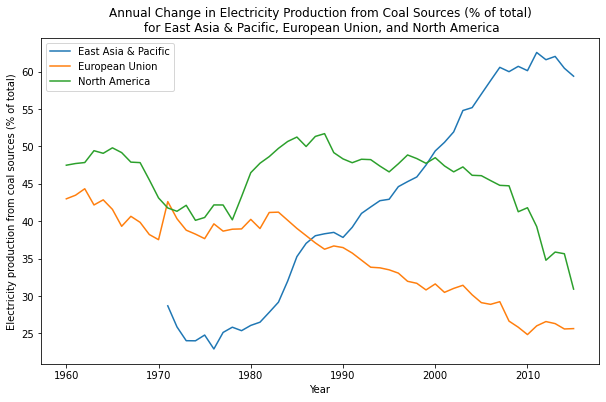

In [28]:
# The index of the data frame is plotted on the x-axis, 
# so set "Year" as the index
coal_based_electricity.set_index("Year", inplace=True)

# Create line plot
coal_based_electricity.groupby("Country Name")["Value"].plot(legend=True, figsize=(10, 6))
plt.title("Annual Change in Electricity Production from Coal Sources (% of total)\n for East Asia & Pacific, European Union, and North America")
plt.ylabel("Electricity production from coal sources (% of total)")

This plot shows annual changes in electricity production from coal sources as a percentage of total electricity production in East Asia and the Pacific, the European Union, and North America. In North America, production declined between the mid- 1960s and the mid 1970s before rising until the late 1980s. Since then, production declined, particularly after 2010. Compared to North America, the European Union had a lower share of electricity derived from coal, and production has declined steadily from about 43% to just over 25%. Meanwhile, in East Asia and the Pacific, production rose by an average of 10% every 10 years adter the mid- 1970s, before tapering off in 2010.    